### 💡 딥러닝 CNN 프로젝트 01 - 뇌종양 분류 프로젝트
- 서로 다른 4가지 유형(정상 포함)의 MRI 이미지 (고용량)

#### 🖼️ 예시
- 왼쪽에서부터 giloma(뇌교종), meningioma(뇌수막종), pituitary(뇌하수체 종양), notumor(정상)

<div style='display: flex; margin-left: 10px;'>
    <div>
        <img src='../datasets/brain_tumor/original/glioma/Tr-gl_0010.jpg' width='200px'>
    </div>
    <div>
        <img src='../datasets/brain_tumor/original/meningioma/Tr-me_0010.jpg' width='200px' style='margin-left: 15px;'>
    </div>
    <div>
        <img src='../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg' width='200px' style='margin-left: 15px;'>
    </div>
    <div>
        <img src='../datasets/brain_tumor/original/notumor/Tr-no_0010.jpg' width='200px' style='margin-left: 15px;'>
    </div>
</div>

### 💻 데이터 전처리
- test 데이터는 이미 분리되어 있는 데이터 세트였기 때문에,  
  original로부터 train과 validation만 분리

#### train, validation 분리
- 실제 디렉토리 생성 안 함

In [1]:
# 이미지와 배치 사이즈 설정
IMAGE_SIZE = 64
BATCH_SIZE = 20

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = '../datasets/brain_tumor/original/'

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 5712 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [3]:
# class_indices의 key: value 순서를 반대로 한 새로운 dict 생성
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

In [4]:
target_names = []

# 반복문으로 위 dict의 문자열(value)을 target_names에 추가
for target in generator.classes:
    target_names.append(target_name[target])

In [5]:
import pandas as pd

# 경로, target_names(list) 및 target 클래스로 데이터프레임 생성
original_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names ,'targets': generator.classes})

# file_path의 '\\'를 '/'로 대체
original_df.loc[:, 'file_paths'] = original_df.file_paths.apply(lambda x: x.replace('\\', '/'))

original_df

file_paths target_names  targets
0     ../datasets/brain_tumor/original/glioma/Tr-glT...       glioma        0
1     ../datasets/brain_tumor/original/glioma/Tr-glT...       glioma        0
2     ../datasets/brain_tumor/original/glioma/Tr-glT...       glioma        0
3     ../datasets/brain_tumor/original/glioma/Tr-glT...       glioma        0
4     ../datasets/brain_tumor/original/glioma/Tr-glT...       glioma        0
...                                                 ...          ...      ...
5707  ../datasets/brain_tumor/original/pituitary/Tr-...    pituitary        3
5708  ../datasets/brain_tumor/original/pituitary/Tr-...    pituitary        3
5709  ../datasets/brain_tumor/original/pituitary/Tr-...    pituitary        3
5710  ../datasets/brain_tumor/original/pituitary/Tr-...    pituitary        3
5711  ../datasets/brain_tumor/original/pituitary/Tr-...    pituitary        3

[5712 rows x 3 columns]

In [6]:
from sklearn.model_selection import train_test_split

# train, validation 데이터 세트 분할
train_images, validation_images, train_targets, validation_targets = \
            train_test_split(original_df.file_paths,
                             original_df.targets,
                             stratify=original_df.targets,
                             test_size=0.2,
                             random_state=124)

print(train_targets.value_counts())
print(validation_targets.value_counts())

targets
2    1276
3    1165
1    1071
0    1057
Name: count, dtype: int64
targets
2    319
3    292
1    268
0    264
Name: count, dtype: int64


In [7]:
# train, validation Dataframe 생성
train_df = original_df.iloc[train_images.index].reset_index(drop=True)
validation_df = original_df.iloc[validation_images.index].reset_index(drop=True)

print(train_df.shape)
print(validation_df.shape)

(4569, 3)
(1143, 3)


#### test DataFrame 생성

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

root = '../datasets/brain_tumor/test/'

# ImageDataGenerator 선언 - RGB 값을 0 ~ 1사이로 스케일링만
image_data_generator = ImageDataGenerator(rescale=1./255)

generator = image_data_generator.flow_from_directory(root,
                                                     target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                     batch_size=BATCH_SIZE,
                                                     class_mode='categorical')

print(generator.class_indices)

Found 1311 images belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


In [9]:
# class_indices의 key: value 순서를 반대로 한 새로운 dict 생성
target_name = {v: k for k, v in generator.class_indices.items()}
target_name

{0: 'glioma', 1: 'meningioma', 2: 'notumor', 3: 'pituitary'}

In [10]:
target_names = []

# 반복문으로 위 dict의 문자열(value)을 target_names에 추가
for target in generator.classes:
    target_names.append(target_name[target])

In [11]:
import pandas as pd

# 경로, target_names(list) 및 target 클래스로 데이터프레임 생성
test_df = pd.DataFrame({'file_paths': generator.filepaths, 'target_names': target_names ,'targets': generator.classes})

# file_path의 '\\'를 '/'로 대체
test_df.loc[:, 'file_paths'] = test_df.file_paths.apply(lambda x: x.replace('\\', '/'))

test_df

file_paths target_names  targets
0     ../datasets/brain_tumor/test/glioma/Te-glTr_00...       glioma        0
1     ../datasets/brain_tumor/test/glioma/Te-glTr_00...       glioma        0
2     ../datasets/brain_tumor/test/glioma/Te-glTr_00...       glioma        0
3     ../datasets/brain_tumor/test/glioma/Te-glTr_00...       glioma        0
4     ../datasets/brain_tumor/test/glioma/Te-glTr_00...       glioma        0
...                                                 ...          ...      ...
1306  ../datasets/brain_tumor/test/pituitary/Te-pi_0...    pituitary        3
1307  ../datasets/brain_tumor/test/pituitary/Te-pi_0...    pituitary        3
1308  ../datasets/brain_tumor/test/pituitary/Te-pi_0...    pituitary        3
1309  ../datasets/brain_tumor/test/pituitary/Te-pi_0...    pituitary        3
1310  ../datasets/brain_tumor/test/pituitary/Te-pi_0...    pituitary        3

[1311 rows x 3 columns]

### 💻 모델 선정
- 이하의 사전 훈련 모델 중 프로젝트에 사용할 모델 선정
> - VGG16
> - Resnet50V2
> - Xception
> - MobileNetV2
- 유사도가 높은 모델들을 프로젝트에 사용

#### VGG16

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step
Image 1:
('n03443371', 'goblet', 0.63599724)
goblet 63.5997%


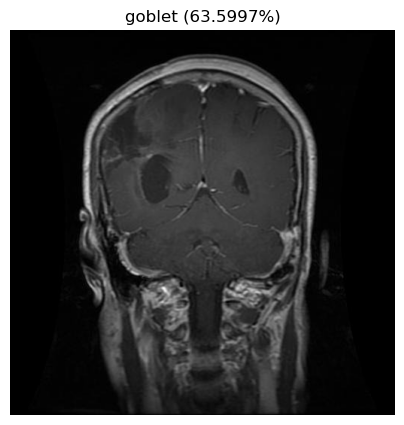



Image 2:
('n03443371', 'goblet', 0.1447365)
goblet 14.4736%


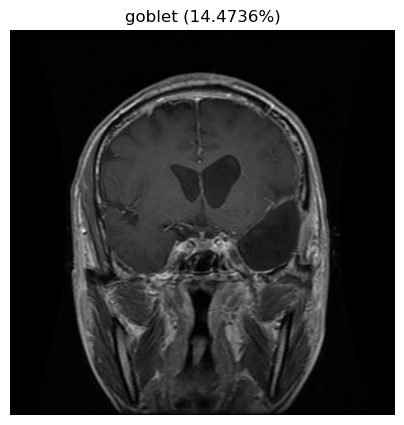



Image 3:
('n01930112', 'nematode', 0.49700457)
nematode 49.7005%


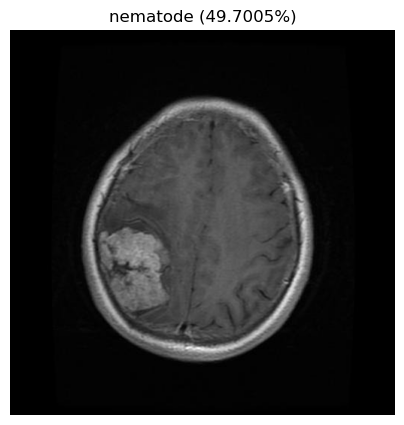



Image 4:
('n01930112', 'nematode', 0.6051558)
nematode 60.5156%


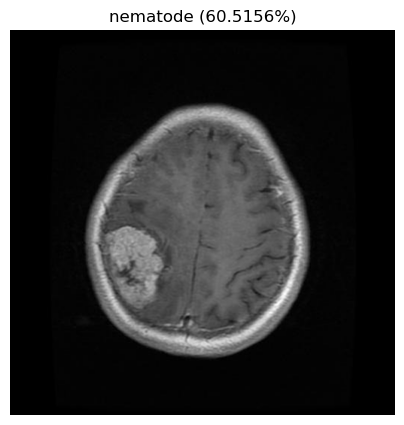



Image 5:
('n03929660', 'pick', 0.65873134)
pick 65.8731%


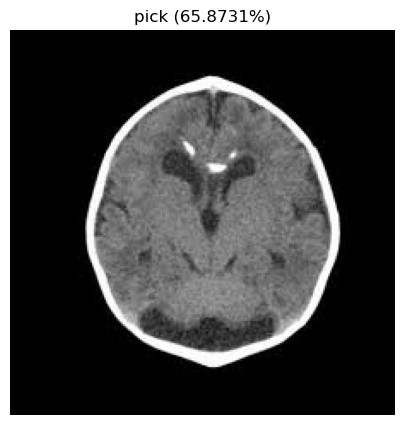



Image 6:
('n01930112', 'nematode', 0.94176394)
nematode 94.1764%


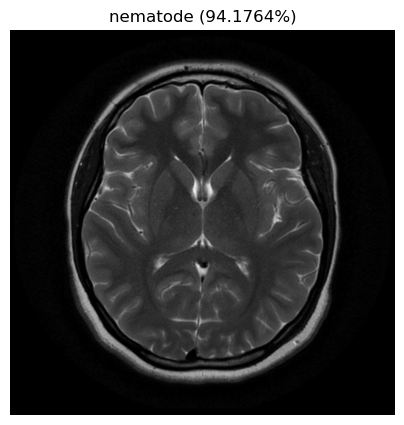



Image 7:
('n03666591', 'lighter', 0.14084458)
lighter 14.0845%


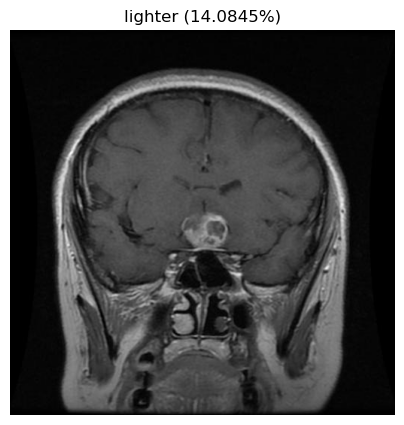



Image 8:
('n03666591', 'lighter', 0.14084458)
lighter 14.0845%


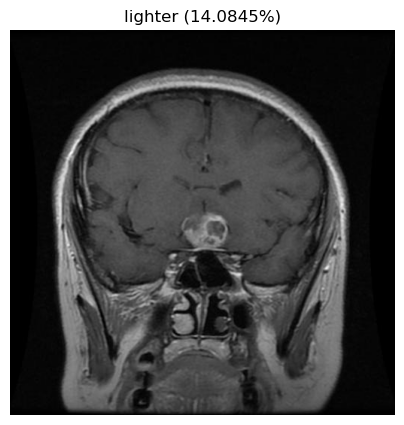

In [14]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# VGG16 모델
model = VGG16(weights='imagenet')

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/brain_tumor/original/glioma/Tr-gl_0010.jpg',
    '../datasets/brain_tumor/original/glioma/Tr-gl_0011.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0010.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0011.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0010.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0011.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### Resnet50V2

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image 1:
('n03868863', 'oxygen_mask', 0.21227446)
oxygen_mask 21.2274%


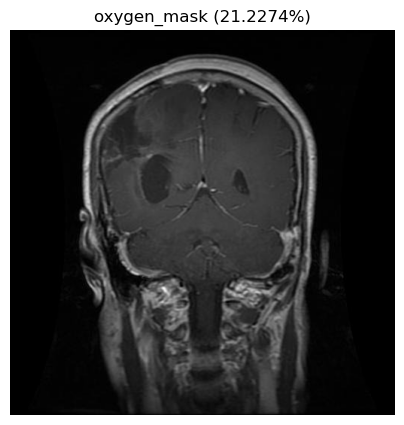



Image 2:
('n03443371', 'goblet', 0.2988421)
goblet 29.8842%


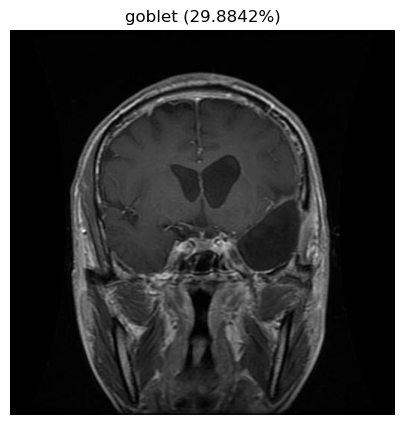



Image 3:
('n01930112', 'nematode', 0.42401296)
nematode 42.4013%


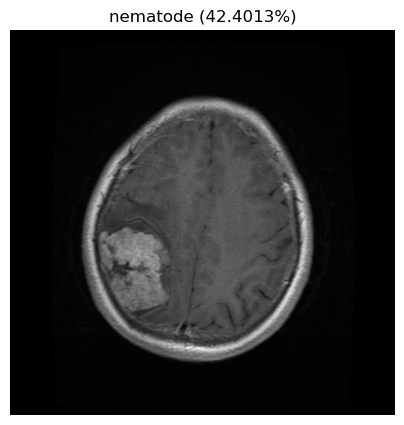



Image 4:
('n01930112', 'nematode', 0.7655967)
nematode 76.5597%


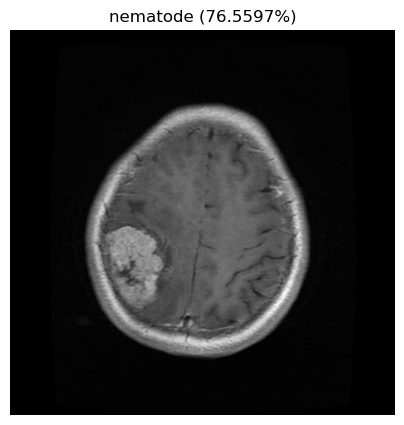



Image 5:
('n03929660', 'pick', 0.58552164)
pick 58.5522%


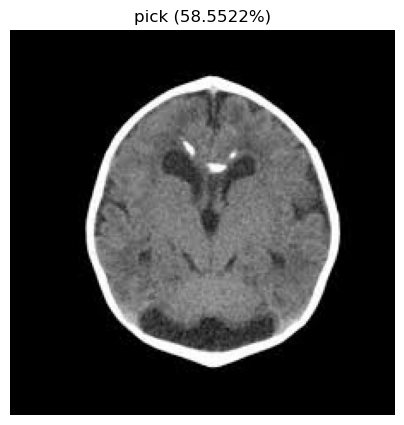



Image 6:
('n04192698', 'shield', 0.24828148)
shield 24.8281%


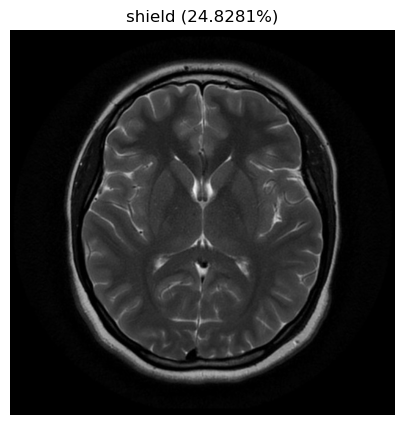



Image 7:
('n04423845', 'thimble', 0.4197058)
thimble 41.9706%


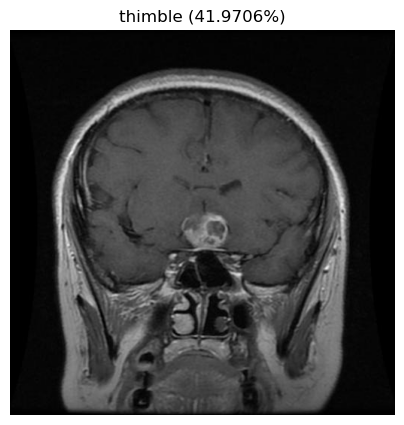



Image 8:
('n04423845', 'thimble', 0.4197058)
thimble 41.9706%


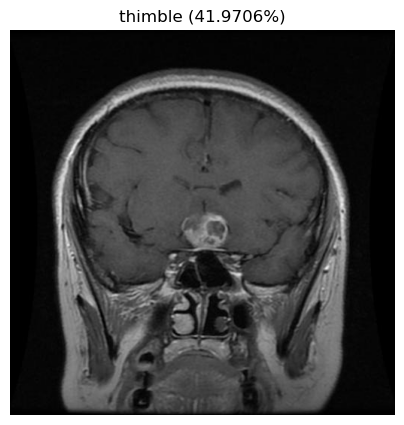

In [15]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# ResNet50 모델
model = ResNet50(weights='imagenet')

# 이미지 로드 및 전처리 함수
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/brain_tumor/original/glioma/Tr-gl_0010.jpg',
    '../datasets/brain_tumor/original/glioma/Tr-gl_0011.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0010.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0011.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0010.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0011.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### Xception

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Image 1:
('n03763968', 'military_uniform', 0.8330133)
military_uniform 83.3013%


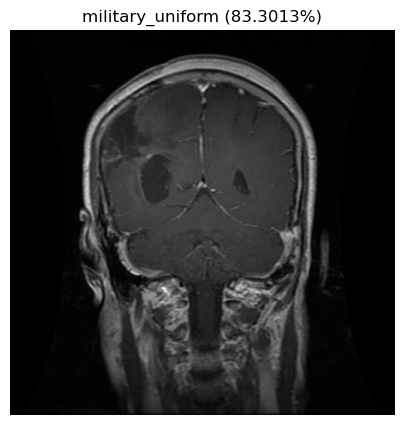



Image 2:
('n03814906', 'necklace', 0.21056014)
necklace 21.056%


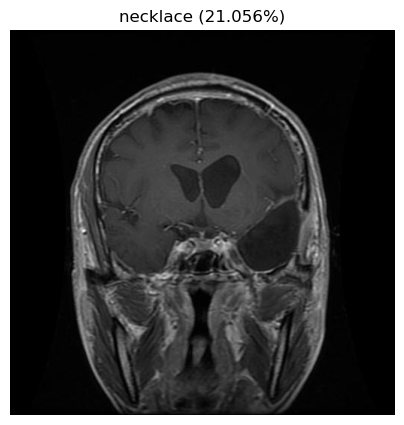



Image 3:
('n03942813', 'ping-pong_ball', 0.8791485)
ping-pong_ball 87.9148%


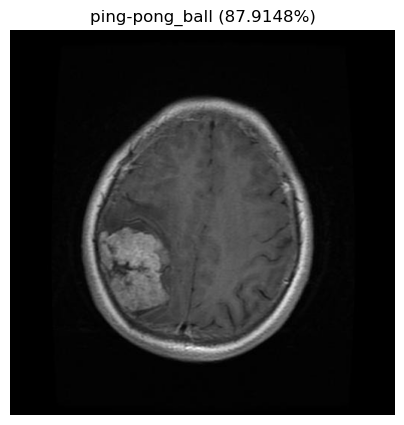



Image 4:
('n03942813', 'ping-pong_ball', 0.7555114)
ping-pong_ball 75.5511%


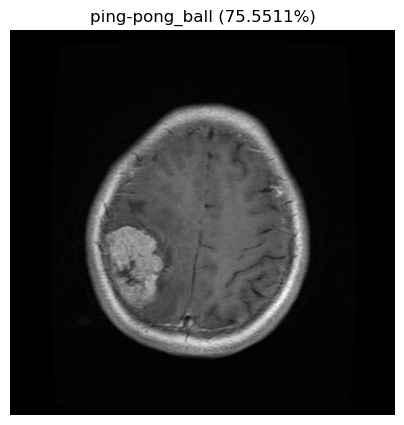



Image 5:
('n03763968', 'military_uniform', 0.6479313)
military_uniform 64.7931%


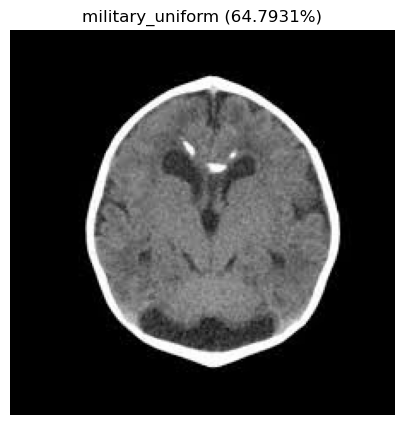



Image 6:
('n03476684', 'hair_slide', 0.2597686)
hair_slide 25.9769%


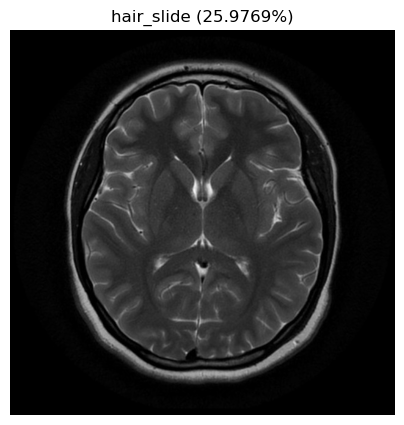



Image 7:
('n02971356', 'carton', 0.30343756)
carton 30.3438%


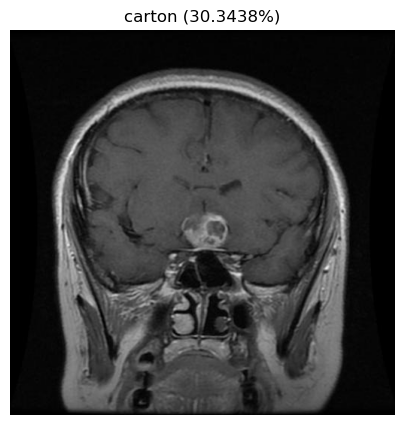



Image 8:
('n02971356', 'carton', 0.30343756)
carton 30.3438%


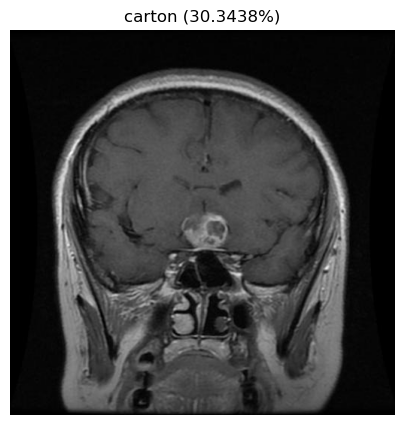

In [16]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.xception import Xception, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# Xception 모델
model = Xception(weights='imagenet')

# 이미지 로드 및 전처리 함수
# Xception 모델은 size 다르게 설정
def load_and_preprocess_image(img_path, target_size=(299, 299)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/brain_tumor/original/glioma/Tr-gl_0010.jpg',
    '../datasets/brain_tumor/original/glioma/Tr-gl_0011.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0010.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0011.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0010.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0011.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### MobileNetV2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 457ms/step
Image 1:
('n03938244', 'pillow', 0.79025364)
pillow 79.0254%


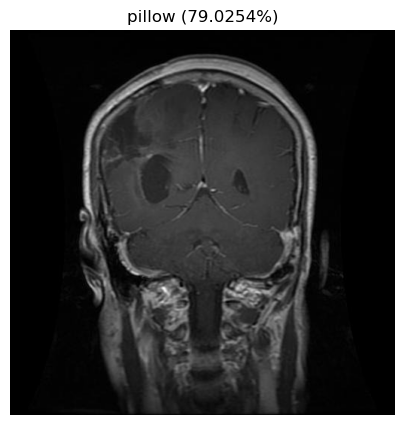



Image 2:
('n03938244', 'pillow', 0.62560195)
pillow 62.5602%


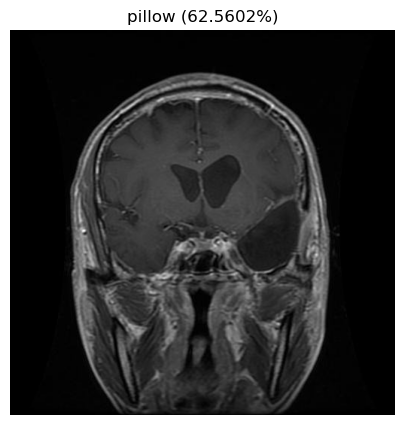



Image 3:
('n07248320', 'book_jacket', 0.5244378)
book_jacket 52.4438%


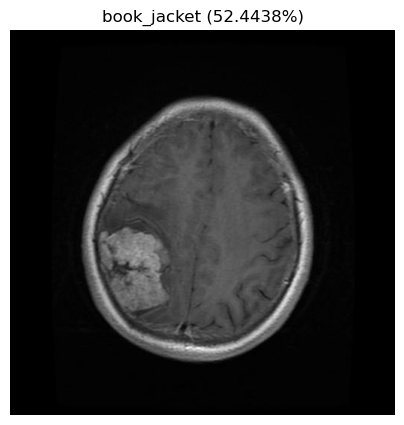



Image 4:
('n02909870', 'bucket', 0.38419336)
bucket 38.4193%


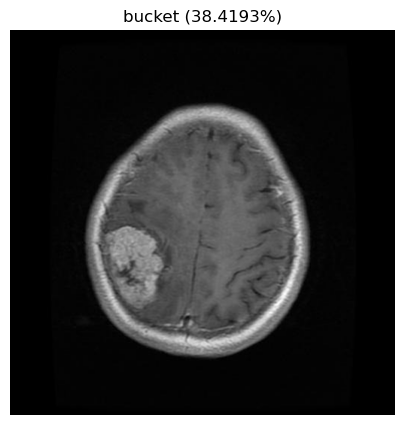



Image 5:
('n04039381', 'racket', 0.92161864)
racket 92.1619%


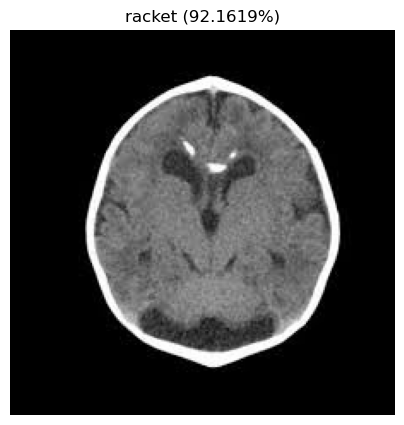



Image 6:
('n04476259', 'tray', 0.45216146)
tray 45.2161%


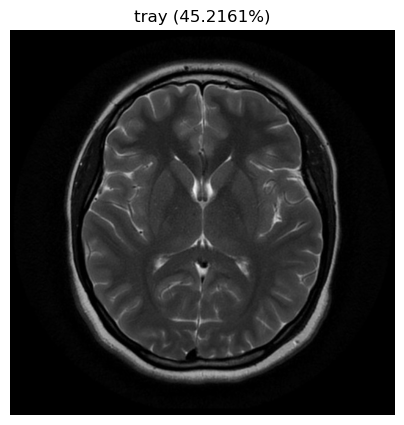



Image 7:
('n02769748', 'backpack', 0.3202073)
backpack 32.0207%


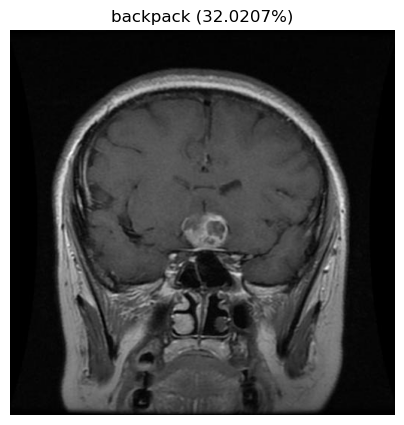



Image 8:
('n02769748', 'backpack', 0.3202073)
backpack 32.0207%


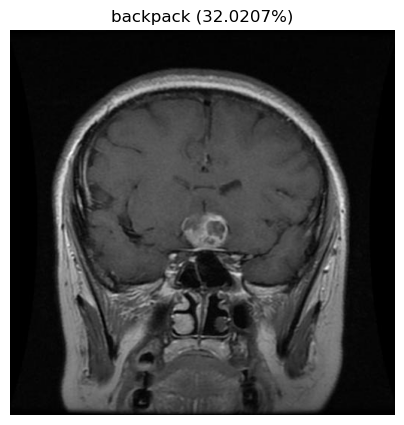

In [17]:
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.mobilenet import MobileNet, decode_predictions
import cv2
import matplotlib.pyplot as plt
import os

# MobileNet 모델
model = MobileNet(weights='imagenet')

# 이미지 로드 및 전처리 함수
# Xception 모델은 size 다르게 설정
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    image = load_img(img_path, target_size=target_size)
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    return image

# 이미지 출력 함수 선언
def show_image_with_prediction(image, prediction):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')
    title = f'{prediction[1]} ({np.round(float(prediction[2]) * 100, 4)}%)'
    plt.title(title)
    plt.show()

# 이미지 파일 경로 리스트
image_paths = [
    '../datasets/brain_tumor/original/glioma/Tr-gl_0010.jpg',
    '../datasets/brain_tumor/original/glioma/Tr-gl_0011.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0010.jpg',
    '../datasets/brain_tumor/original/meningioma/Tr-me_0011.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0010.jpg',
    '../datasets/brain_tumor/original/notumor/Tr-no_0011.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
    '../datasets/brain_tumor/original/pituitary/Tr-pi_0010.jpg',
]

# 이미지를 로드하고 배열로 변환
images = np.vstack([load_and_preprocess_image(img_path) for img_path in image_paths])

# 이미지 예측
predictions = model.predict(images)

# 예측 결과를 디코딩하고 출력
for i, img_path in enumerate(image_paths):
    # 원본 이미지를 로드하고 색상 변환
    image = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    prediction = decode_predictions(np.expand_dims(predictions[i], axis=0))

    # 예측 결과 출력 및 이미지 표시
    print(f"Image {i + 1}:")
    print(prediction[0][0])
    print(prediction[0][0][1], f'{np.round(prediction[0][0][2] * 100, 4)}%')
    
    show_image_with_prediction(image, prediction[0][0])
    print("\n")

#### 중간 분석
- 위 모델들과 현재 이미지 데이터 세트와는 유사도가 낮은 것으로 추정

### 모델 선정 결과
- 각 사전 훈련 모델이 훈련한 데이터 세트와 이번에 사용하는 데이터 세트의 유사도가 낮기 때문에  
  유사도로 사용할 모델을 선정하는 것은 무의미함
- 결국 다른 기준을 마련해야 하는데, 학습에 소요되는 시간을 고려해봤을 때  
  모델의 구조가 가장 단순한 VGG16과, 층을 깊게 가져가면서도 기울기를 유지할 수 있는 Resnet50V2를 사용하는 것이 적합하다고 판단

### 🚩 1st Cycle - VGG16

#### 스케일링 방식 확인 (TensorFlow / Torch)

In [23]:
# 이미지의 RGB 값 분포를 히스토그램으로 시각화하는 함수
def show_pixel_histogram(image):
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
    titles = ['Red', 'Green', 'Blue']
    for i in range(3):
        axs[i].hist(image[:, :, i].flatten(), bins=100, alpha=0.5)
        title_str = titles[i]
        axs[i].set(title=title_str)

In [24]:
def preprocessing_scaling(image, mode='tf'):
    # Tensorflow의 경우, -1 ~ 1 사이로 RGB 값 스케일링
    if mode == 'tf':
        image = image / 127.5
        image -= 1.

    # PyTorch의 경우, z-score로 RGB 값 스케일링
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

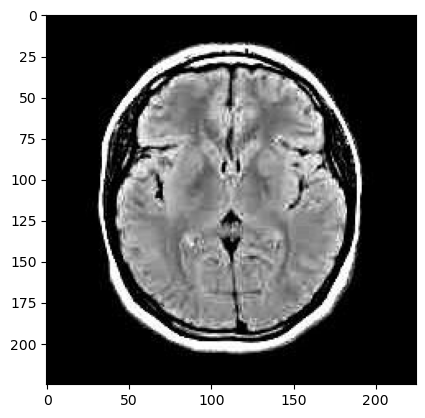

In [25]:
import cv2
import matplotlib.pyplot as plt

# 무작위로 고른 이미지 출력
image = cv2.cvtColor(cv2.imread(train_df.file_paths.iloc[365]), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

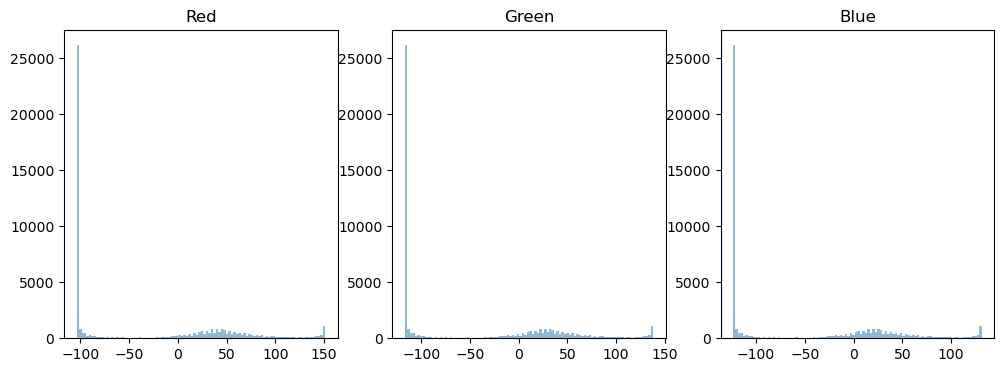

In [26]:
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg_preprocess_input

# RGB를 전처리한 결과를 히스토그램으로 시각화
scaled_image_vgg = vgg_preprocess_input(image)
show_pixel_histogram(scaled_image_vgg)

#### 중간 분석
-  VGG16은 TensorFlow 방식으로 스케일링 함

#### flow 생성
> - 위의 DataFrame으로부터 flow

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 전처리 함수 - 스케일링
def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf':
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

# VGG16 모델을 사용하기 때문에, 해당 모델의 스케일링 방식인 tf 사용 (tf가 default라 따로 기재 안 함)
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

# 각 dataframe으로부터 flow한 train, validation, test flow 생성 - 모델 fit 및 evalutaion 용도
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                           x_col='file_paths', 
                                                           y_col='target_names',
                                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                           class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                               x_col='file_paths', 
                                               y_col='target_names',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode='categorical')

# 각 flow의 클래스 종류 출력 (제대로 생성되었는지 확인)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


#### 모델 생성 및 학습

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 4가지였기 때문에 Dense도 7로 지정
    output = Dense(4, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

In [28]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# VGG16 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='vgg16', verbose=True)

# 모델 컴파일링
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,3

 Total params: 14,766,392 (56.33 MB)

 Trainable params: 14,766,392 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [30]:
import gc

# Garbage Collecting
gc.collect()

13222

In [31]:
N_EPOCHS = 20

# 모델 학습
history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS,
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - acc: 0.3843 - loss: 1.3752 - val_acc: 0.6413 - val_loss: 0.8160 - learning_rate: 0.0010
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 181s 1s/step - acc: 0.7236 - loss: 0.7063 - val_acc: 0.7857 - val_loss: 0.5926 - learning_rate: 0.0010
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 209s 1s/step - acc: 0.8156 - loss: 0.5303 - val_acc: 0.8058 - val_loss: 0.5222 - learning_rate: 0.0010
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 210s 1s/step - acc: 0.8763 - loss: 0.3544 - val_acc: 0.8915 - val_loss: 0.3308 - learning_rate: 0.0010
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - acc: 0.8938 - loss: 0.3069 - val_acc: 0.8679 - val_loss: 0.3733 - learning_rate: 0.0010
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 213s 1s/step - acc: 0.8972 - loss: 0.3039 - val_acc: 0.8906 - val_loss: 0.2863 - learning_rate: 0.0010
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 206s 1s/step - acc: 0.9295 - loss: 0.2052 - val_acc: 0.9011 - val_loss: 0.2977 - learning_rate: 0.0010
Epoch 8/20

In [32]:
# 모델 평가
model.evaluate(test_flow)

41/41 ━━━━━━━━━━━━━━━━━━━━ 10s 232ms/step - acc: 0.9440 - loss: 0.1960


[0.2181902974843979, 0.9473684430122375]

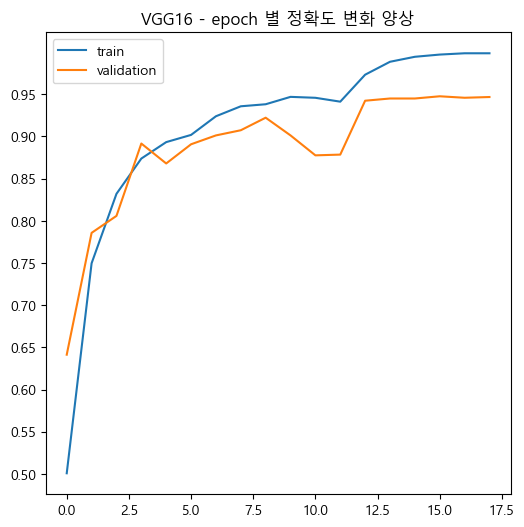

In [33]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('VGG16 - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 🤖 1st Cycle - VGG16 모델 성능 검증
- 시각화를 통해 모델이 실제 이미지를 얼마나 잘 예측하는지 확인

In [14]:
import matplotlib.pyplot as plt
# 이미지 출력 함수
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

In [17]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 후 최적의 가중치 로드, 이후 컴파일링
model = create_model(model_name='vgg16', verbose=True)
model.load_weights('./callback_files/weights.016-0.2696-0.9969.weights.h5')
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          51,3

 Total params: 14,766,392 (56.33 MB)

 Trainable params: 14,766,392 (56.33 MB)

 Non-trainable params: 0 (0.00 B)

#### 이미지 시각화를 위한 데이터 준비

In [19]:
import albumentations as A
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# train, validation, test DataFrame으로부터 file_paths(이미지)의 경로값과 원핫 인코딩 된 targets 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step


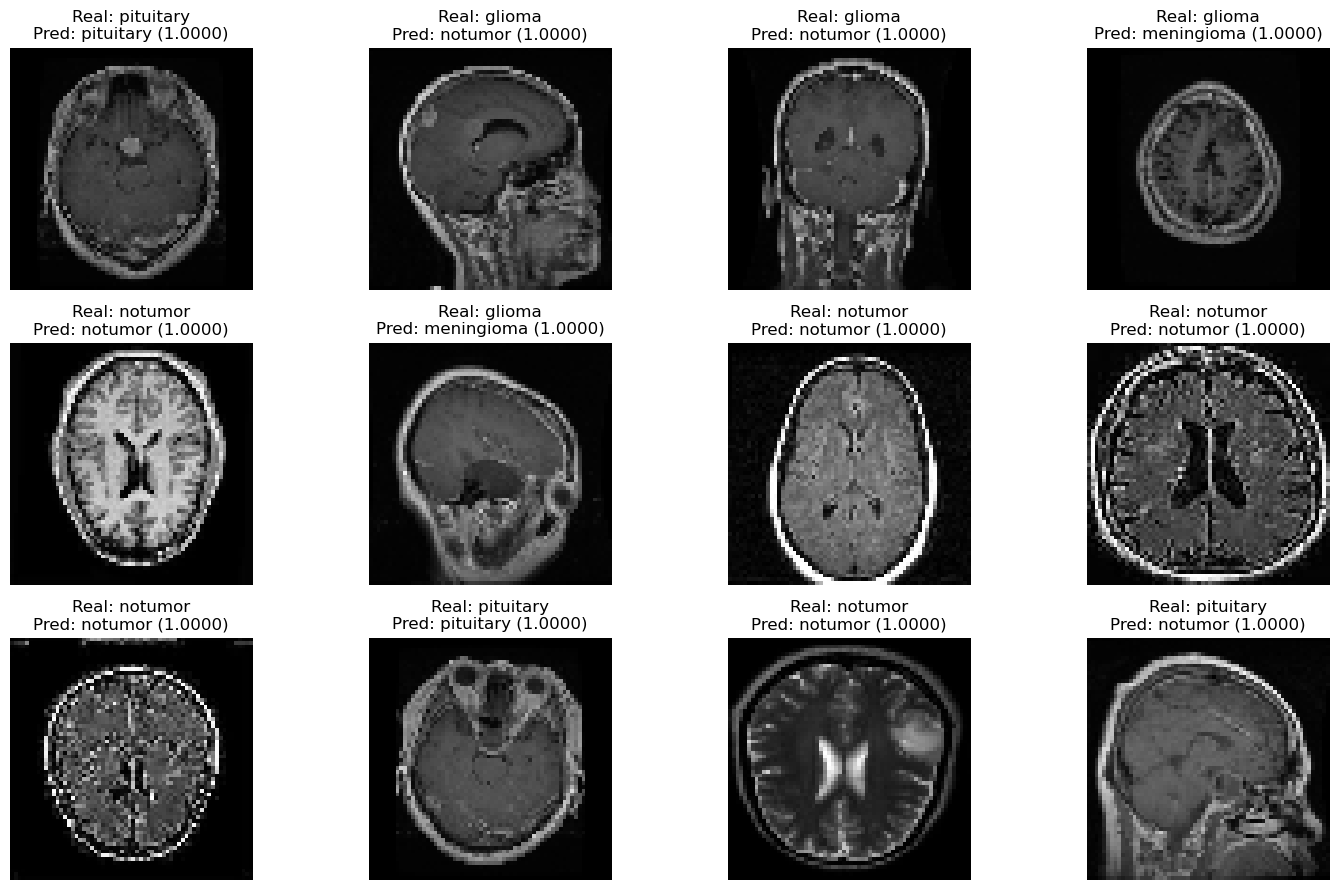

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.vgg16 import preprocess_input as vgg16_preprocess_input

# 데이터 클래스
class_names = ['glioma',
               'meningioma',
               'notumor',
               'pituitary']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 100
end_index = 112

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들과 예측 클래스 시각화
for idx, i in enumerate(range(start_index, end_index)):
    # 위 인덱스 번호를 하나하나 순회하면서 이미지 파일 경로 가져오기
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    processed_image = vgg16_preprocess_input(image.copy())

    # 모델로 이미지 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

#### 1st Cycle - VGG16 모델 훈련 결과
- 위 12개의 이미지 중 7개의 이미지에 대해 정확한 예측을 함
- 위의 예측 결과와 정확도로 미루어볼 때, 추가 학습은 불필요할 것으로 판단

### 🚩 2nd Cycle - Resnet50V2

#### 스케일링 방식 확인 (TensorFlow / Torch)

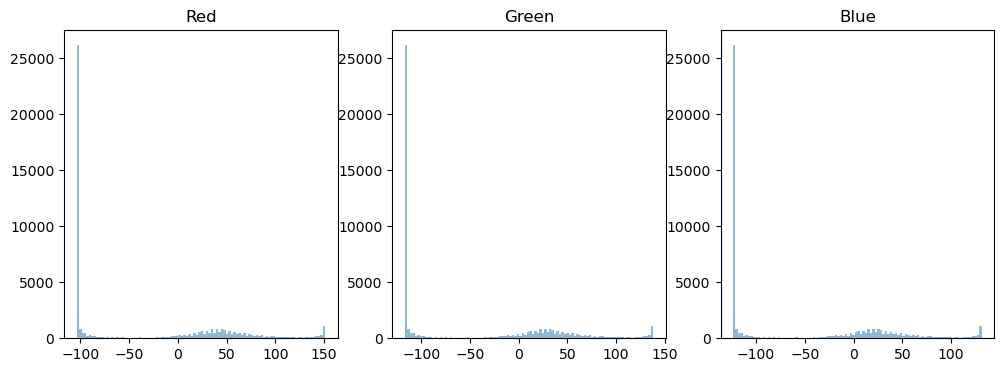

In [27]:
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

# RGB를 전처리한 결과를 히스토그램으로 시각화
scaled_image_resnet = resnet_preprocess_input(image)
show_pixel_histogram(scaled_image_resnet)

#### 중간 분석
-  Resnet50V2 역시 TensorFlow 방식으로 스케일링 함

#### flow 생성
> - 위의 DataFrame으로부터 flow

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import albumentations as A

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 데이터 전처리 함수 - 스케일링
def preprocessing_scaling(image, mode='tf'):
    if mode == 'tf':
        image = image / 127.5
        image -= 1.
    
    elif mode == 'torch':
        image = image / 255.
        mean = [0.485, 0.456, 0.406]
        std = [0.229, 0.224, 0.225]
        
        image[:, :, 0] = (image[:, :, 0] - mean[0])/std[0]
        image[:, :, 1] = (image[:, :, 1] - mean[1])/std[1]
        image[:, :, 2] = (image[:, :, 2] - mean[2])/std[2]
        
    return image

# Resnet50V2 모델을 사용하기 때문에, 해당 모델의 스케일링 방식인 tf 사용 (tf가 default라 따로 기재 안 함)
train_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
validation_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)
test_generator = ImageDataGenerator(preprocessing_function=preprocessing_scaling)

# 각 dataframe으로부터 flow한 train, validation, test flow 생성 - 모델 fit 및 evalutaion 용도
train_flow = train_generator.flow_from_dataframe(dataframe=train_df, 
                                                 x_col='file_paths', 
                                                 y_col='target_names',
                                                 target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                 class_mode='categorical',
                                                 shuffle=True)

validation_flow = validation_generator.flow_from_dataframe(dataframe=validation_df, 
                                                           x_col='file_paths', 
                                                           y_col='target_names',
                                                           target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                                           class_mode='categorical')

test_flow = test_generator.flow_from_dataframe(dataframe=test_df, 
                                               x_col='file_paths', 
                                               y_col='target_names',
                                               target_size=(IMAGE_SIZE, IMAGE_SIZE),
                                               class_mode='categorical')

# 각 flow의 클래스 종류 출력 (제대로 생성되었는지 확인)
print(train_flow.class_indices)
print(validation_flow.class_indices)
print(test_flow.class_indices)

Found 4569 validated image filenames belonging to 4 classes.
Found 1143 validated image filenames belonging to 4 classes.
Found 1311 validated image filenames belonging to 4 classes.
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


#### 모델 생성 및 학습

In [29]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense , Conv2D , Dropout , Flatten , Activation, MaxPooling2D , GlobalAveragePooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.regularizers import l1, l2

from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications import ResNet50V2
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import MobileNetV2

IMAGE_SIZE = 64
BATCH_SIZE = 20

# 모델 생성 함수
def create_model(model_name='vgg16', verbose=False):
    input_tensor = Input(shape=(IMAGE_SIZE, IMAGE_SIZE, 3))

    # 입력받은 model_name에 따라 다른 모델 사용
    # VGG16
    if model_name == 'vgg16':
        model = VGG16(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # ResNet50V2
    elif model_name == 'resnet50':
        model = ResNet50V2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Xception (Inception 기반)
    elif model_name == 'xception':
        model = Xception(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # Mobilenet
    elif model_name == 'mobilenet':
        model = MobileNetV2(input_tensor=input_tensor, include_top=False, weights='imagenet')

    # 모델의 출력값을 변수 x에 할당
    x = model.output

    # Classifier
    # VGG16 이외의 모델은 층 구조가 깊기 때문에 Dropout 사용 
    x = GlobalAveragePooling2D()(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)
        
    x = Dense(100, activation='relu')(x)
    if model_name != 'vgg16':
        x = Dropout(rate=0.5)(x)

    # 이미지 데이터의 클래스가 4가지였기 때문에 Dense도 7로 지정
    output = Dense(4, activation='softmax', name='output')(x)
    
    model = Model(inputs=input_tensor, outputs=output)

    # 함수의 verbose 파라미터를 True로 설정 시, 모델 객체 생성과 함께 구조도 같이 출력
    if verbose:
        model.summary()

    # 모델 객체 반환
    return model

In [30]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy

# VGG16 모델 생성 (+ 모델 구조 출력)
model = create_model(model_name='resnet50', verbose=True)

# 모델 컴파일링
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy, metrics=['acc'])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,770,104 (90.68 MB)

 Trainable params: 23,724,664 (90.50 MB)

 Non-trainable params: 45,440 (177.50 KB)

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping

# callback 선언
mcp_cb = ModelCheckpoint(
    filepath="./callback_files/resnet50v2/cycle1/weights.{epoch:03d}-{val_loss:.4f}-{acc:.4f}.weights.h5",
    monitor='val_loss',
    save_best_only=False,
    save_weights_only=True,
    mode='min'
)

rlr_cb = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=3,
    mode='min'
)

ely_cb = EarlyStopping(
    monitor='val_loss',
    patience=5,
    mode='min'
)

In [32]:
import gc

# Garbage Collecting
gc.collect()

78425

In [33]:
N_EPOCHS = 20

# 모델 학습
history = model.fit(train_flow,
                    batch_size=BATCH_SIZE,
                    epochs=N_EPOCHS,
                    validation_data=validation_flow,
                    callbacks=[mcp_cb, rlr_cb, ely_cb])

Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


143/143 ━━━━━━━━━━━━━━━━━━━━ 96s 551ms/step - acc: 0.6523 - loss: 0.9669 - val_acc: 0.8014 - val_loss: 1.2083 - learning_rate: 0.0010
Epoch 2/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 87s 607ms/step - acc: 0.8875 - loss: 0.3407 - val_acc: 0.8950 - val_loss: 0.3480 - learning_rate: 0.0010
Epoch 3/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 103s 717ms/step - acc: 0.9015 - loss: 0.2942 - val_acc: 0.8346 - val_loss: 0.7829 - learning_rate: 0.0010
Epoch 4/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 124s 869ms/step - acc: 0.9373 - loss: 0.2068 - val_acc: 0.8731 - val_loss: 0.4819 - learning_rate: 0.0010
Epoch 5/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 124s 865ms/step - acc: 0.9266 - loss: 0.2277 - val_acc: 0.8810 - val_loss: 0.3296 - learning_rate: 0.0010
Epoch 6/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 123s 858ms/step - acc: 0.8937 - loss: 0.3749 - val_acc: 0.2791 - val_loss: 282832.3125 - learning_rate: 0.0010
Epoch 7/20
143/143 ━━━━━━━━━━━━━━━━━━━━ 123s 858ms/step - acc: 0.7696 - loss: 0.6469 - val_acc: 0.7087 - val_loss: 10.1317 - learnin

In [34]:
# 모델 평가
model.evaluate(test_flow)

41/41 ━━━━━━━━━━━━━━━━━━━━ 20s 469ms/step - acc: 0.9612 - loss: 0.1713


[0.1454649716615677, 0.9588100910186768]

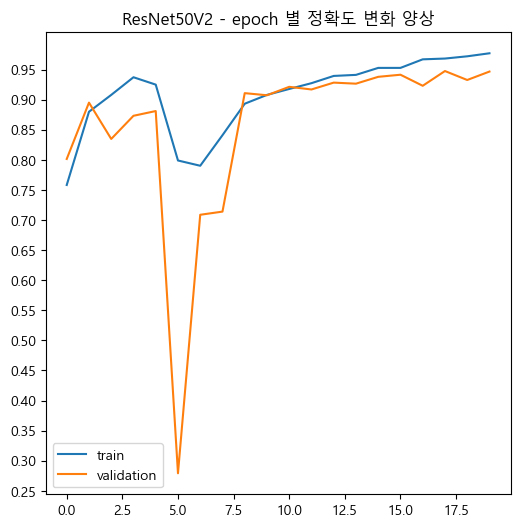

In [35]:
import matplotlib.pyplot as plt

# eopch 별 정확도 변화를 시각화하는 함수
def show_history(history):
    # 폰트를 맑은 고딕으로 설정하고 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.rcParams['axes.unicode_minus'] = False
    
    plt.figure(figsize=(6, 6))
    plt.yticks(np.arange(0, 1, 0.05))
    plt.plot(history.history['acc'], label='train')
    plt.plot(history.history['val_acc'], label='validation')
    plt.title('ResNet50V2 - epoch 별 정확도 변화 양상')
    plt.legend()

# epoch 별 정확도 변화 시각화
show_history(history)

#### 🤖 2nd Cycle - Resnet50V2 모델 성능 검증
- 시각화를 통해 모델이 실제 이미지를 얼마나 잘 예측하는지 확인

In [36]:
import matplotlib.pyplot as plt
# 이미지 출력 함수
def show_image(image):
    plt.figure(figsize=(5, 5))
    plt.imshow(image)
    plt.axis('off')

In [37]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy

# 모델 생성 후 최적의 가중치 로드, 이후 컴파일링
model = create_model(model_name='resnet50', verbose=True)
model.load_weights('./callback_files/weights.018-0.1539-0.9683.weights.h5')
model.compile(optimizer=Adam(), loss=CategoricalCrossentropy(), metrics=['acc'])

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 64, 64, 3)         │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 70, 70, 3)         │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 32, 32, 64)        │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 34, 34, 64)        │               0 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 16, 16, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_bn        │ (None, 16, 16, 64)        │             256 │ pool1_pool[0][0]           │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_preact_relu      │ (None, 16, 16, 64)        │               0 │ conv2_block1_preact_bn[0]… │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 16, 16, 64)        │           4,096 │ conv2_block1_preact_relu[… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_pad            │ (None, 18, 18, 64)        │               0 │ conv2_block1_1_relu[0][0]  │
│ (ZeroPadding2D)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 16, 16, 64)        │          36,864 │ conv2_block1_2_pad[0][0]   │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 16, 16, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 16, 16, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │               

 Total params: 23,770,104 (90.68 MB)

 Trainable params: 23,724,664 (90.50 MB)

 Non-trainable params: 45,440 (177.50 KB)

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = './callback_files/weights.018-0.1539-0.9683.weights.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

#### 이미지 시각화를 위한 데이터 준비

In [38]:
import albumentations as A
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

# train, validation, test DataFrame으로부터 file_paths(이미지)의 경로값과 원핫 인코딩 된 targets 가져오기
train_file_paths = train_df['file_paths'].values
train_targets = pd.get_dummies(train_df['targets']).values

validation_file_paths = validation_df['file_paths'].values
validation_targets = pd.get_dummies(validation_df['targets']).values

test_file_paths = test_df['file_paths'].values
test_targets = pd.get_dummies(test_df['targets']).values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step


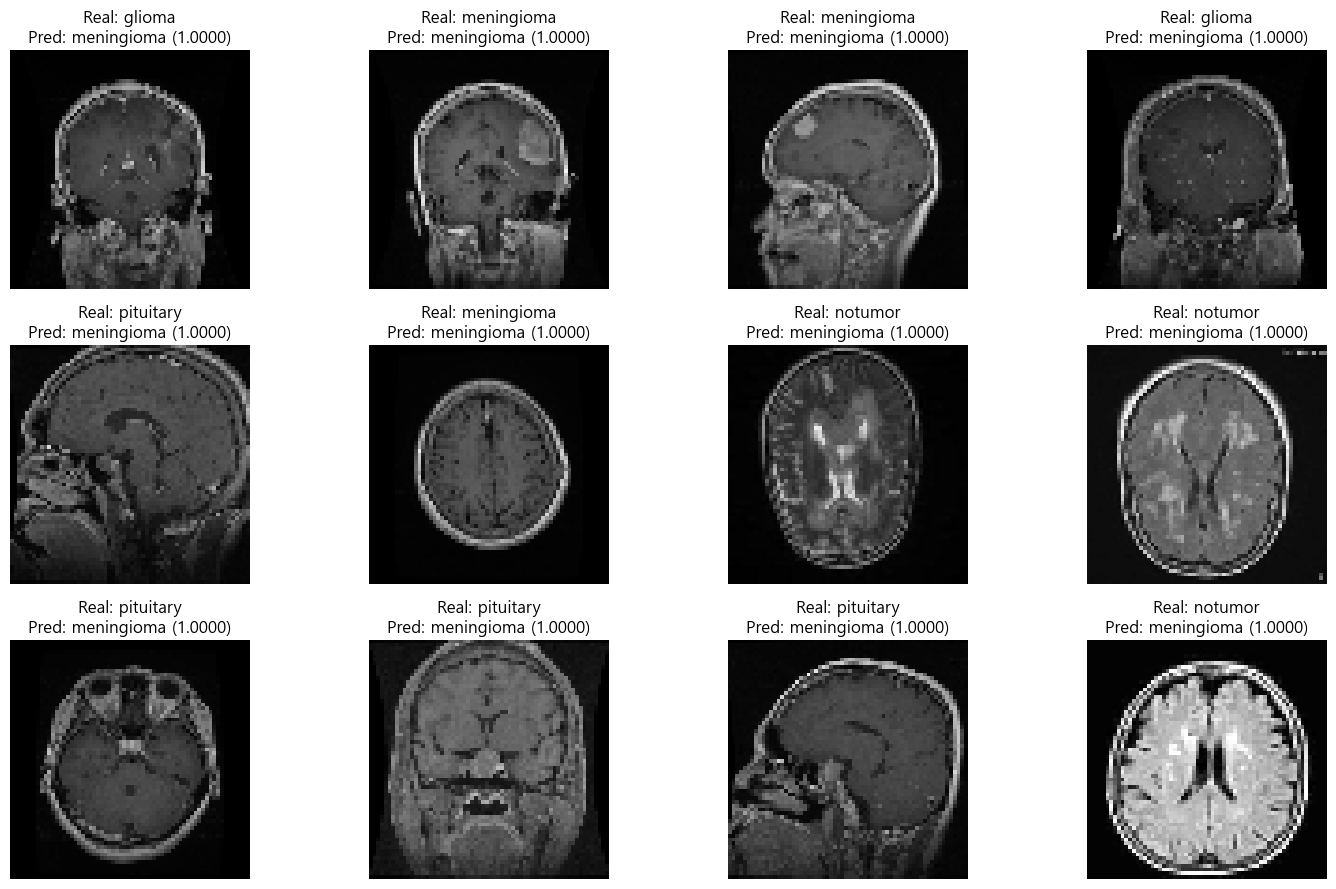

In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import preprocess_input as resnet_preprocess_input

# 데이터 클래스
class_names = ['glioma',
               'meningioma',
               'notumor',
               'pituitary']

# 선택할 이미지의 시작 인덱스와 끝 인덱스 지정
start_index = 200
end_index = 212

# 행과 열의 개수 지정
num_rows = (end_index - start_index + 3) // 4  # +3 ensures rounding up
num_cols = 4

# 서브플롯 설정
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 3))

# 시작부터 끝 인덱스까지의 이미지들과 예측 클래스 시각화
for idx, i in enumerate(range(start_index, end_index)):
    # 위 인덱스 번호를 하나하나 순회하면서 이미지 파일 경로 가져오기
    selected_file_path = train_file_paths[i]

    # 이미지 로드 및 전처리
    image = cv2.cvtColor(cv2.imread(selected_file_path), cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMAGE_SIZE, IMAGE_SIZE))
    processed_image = resnet_preprocess_input(image.copy())

    # 모델로 이미지 예측
    predicted_probabilities = model.predict(np.expand_dims(processed_image, axis=0))

    # 예측 클래스 및 확률 출력
    predicted_class_index = np.argmax(predicted_probabilities)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = predicted_probabilities[0][predicted_class_index]

    # 실제 클래스 정보 가져오기
    real_class_index = np.where(train_targets[i])[0][0]  # True 값의 인덱스 가져오기
    real_class_name = class_names[real_class_index]

    # 서브플롯에 이미지와 텍스트 출력
    ax = axs[idx // num_cols, idx % num_cols]
    ax.imshow(image)
    ax.set_title(f"Real: {real_class_name}\nPred: {predicted_class_name} ({predicted_probability:.4f})")
    ax.axis('off')

# 남은 서브플롯을 비활성화
for j in range(idx + 1, num_rows * num_cols):
    axs[j // num_cols, j % num_cols].axis('off')

plt.tight_layout()
plt.show()

#### 2nd Cycle - Resnet50V2 모델 훈련 결과
- VGG16에 비해 높은 정확도를 보였지만,   
  실제 이미지에 대한 예측은 meningioma(뇌수막종)으로만 한 것을 확인

### 🚩 요약 및 느낀점
- 같은 데이터 세트를 사용했음에도 VGG16과 Resnet50V2의 epoch 별 정확도와 loss 변화 양상이 서로 다르게 나타났으며,  
  같은 이미지에 대한 예측 또한 서로 달랐다.
- 또한, 학습을 진행하기 전 4가지 사전 훈련 모델(VGG16, ResNet50V2, Xception, MobileNet)이  
  같은 이미지에 대한 예측을 다르게 한 것을 확인했다.

- 위의 사실들로 미루어볼 때, 같은 이미지를 학습하더라도 모델 별로 가중치와 학습 과정이 서로 다르다는 사실을 알았다.
- 이에 따라 학습시키고자 할 이미지의 특성에 적합한 모델을 찾아서 학습시키는 것이 중요하다는 것을 느꼈다.

#### 추후 할 것들
- 이미지 별로 다른 예측을 할 수 있도록 모델 구조 수정해보기
- 위에서 언급한 대로 뇌 CT 이미지의 특성을 잘 생각해볼 것